## Classification Analysis<br>
&ensp;&ensp;[prepare categorical data](#section1) <br>
&ensp; [multi-class vs. multi-label](#section2)<br>
1. [multi-class](#multi-class)
2. [multi-label](#multi-label)
## [Call back](#call-back)
1. [history](#history) [history_plot](#history_plot)

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential


#### Basic of Neural Networks

In [33]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    return(output)

In [34]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):
    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output]) 
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    # Return model output
    return(model_output)
# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))
# Print results
print(results)        

NameError: name 'input_data' is not defined

#### read data

In [6]:
df=pd.read_csv('https://assets.datacamp.com/production/repositories/654/datasets/8a57adcdb5bfb3e603dad7d3c61682dfe63082b8/hourly_wages.csv')
# Save the number of columns in predictors: n_cols
n_cols = df.shape[1]
predictors=df.loc[:, df.columns != 'wage_per_hour'].to_numpy()
target=df['wage_per_hour'].to_numpy()

### Bulid Classification models

<s id='section1'></a> 
#### prepare dataset for keras

In [1]:
import pandas as pd 
from tensorflow.keras.utils import to_categorical
df = pd.read_csv('darts.csv') 
#turn Object_str into Category_str 
df.competitor = pd.Categorical(df.competitor)
## Assign a number to each category (label encoding): turn category_str into category_number
df.competitor = df.competitor.cat.codes
# Turn response variable into one-hot response vector
y = to_categorical(df.competitor)
X=df.drop(columns=['competitor']).to_numpy()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a id='section2'></a> 
[multi-class vs. multi-label](https://gombru.github.io/2018/05/23/cross_entropy_loss/)<p>
multi-class: output_activation_fun='softmax'; loss='categorical_crossentropy' <br>
multi-label: output_activation_fun='sigmoid'; loss='binary_crossentropy' <p>

<img src="https://gombru.github.io/assets/cross_entropy_loss/multiclass_multilabel.png" width="400"/><br>


<a id='multi-class'></a> 
#### 1. Multi-class

In [8]:
# Save the number of columns in predictors: n_cols
n_cols = X.shape[1]
# build the model
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,)))
model.add(Dense(32,activation='relu' ))
model.add(Dense(4,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy')
# Fit the model
history=model.fit(X_train, y_train,epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
17/17 [==============================] - 0s 10ms/step - loss: 1.3745 - val_loss: 1.3597
Epoch 2/5
17/17 [==============================] - 0s 3ms/step - loss: 1.3556 - val_loss: 1.3427
Epoch 3/5
17/17 [==============================] - 0s 3ms/step - loss: 1.3386 - val_loss: 1.3262
Epoch 4/5
17/17 [==============================] - 0s 3ms/step - loss: 1.3214 - val_loss: 1.3086
Epoch 5/5
17/17 [==============================] - 0s 4ms/step - loss: 1.3025 - val_loss: 1.2903


In [9]:
model.predict(X[0:1])

array([[0.22134073, 0.27171084, 0.2681071 , 0.2388413 ]], dtype=float32)

<c id='multi-label'></a> 
#### 2. Multi-label

In [84]:
# Save the number of columns in predictors: n_cols
n_cols = X.shape[1]
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(n_cols,)))
model.add(Dense(32,activation='relu' ))
model.add(Dense(4,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=[tf.keras.metrics.BinaryAccuracy()])
# Fit the model
history=model.fit(X_train, y_train,epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
17/17 [==============================] - 1s 11ms/step - loss: 0.6783 - binary_accuracy: 0.6702 - val_loss: 0.6603 - val_binary_accuracy: 0.7386
Epoch 2/5
17/17 [==============================] - 0s 3ms/step - loss: 0.6480 - binary_accuracy: 0.7481 - val_loss: 0.6286 - val_binary_accuracy: 0.7500
Epoch 3/5
17/17 [==============================] - 0s 3ms/step - loss: 0.6145 - binary_accuracy: 0.7500 - val_loss: 0.5957 - val_binary_accuracy: 0.7500
Epoch 4/5
17/17 [==============================] - 0s 4ms/step - loss: 0.5827 - binary_accuracy: 0.7500 - val_loss: 0.5693 - val_binary_accuracy: 0.7500
Epoch 5/5
17/17 [==============================] - 0s 4ms/step - loss: 0.5592 - binary_accuracy: 0.7500 - val_loss: 0.5538 - val_binary_accuracy: 0.7500


<a id='call-back'></a> 
#### [Callback](https://keras.io/api/callbacks/) <br>
perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).
1. history 
2. EarlyStopping<br>
3. Model checkpoint<br>
save a model or weights (in a checkpoint file) at some interval,<br>
parameters: save_best_only=False, save_weights_only=False

<c id='history'>
1. history 

In [85]:
history.history['loss','binary_accuracy','val_loss']

[0.6702425479888916, 0.7481343150138855, 0.75, 0.75, 0.75]

<s id='history_plot'>

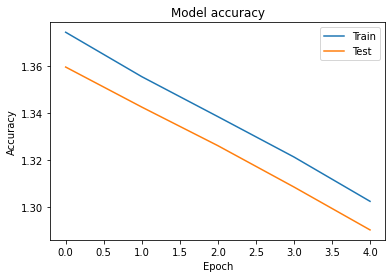

In [12]:
#history plot
import matplotlib.pyplot as plt
# Plot train vs test accuracy per epoch 
plt.figure() 
# Use the history metrics 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# Make it pretty 
plt.title('Model accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'])
plt.show()

pass a list of callbacks to the .fit() method of a model:<br>
my_callbacks = [ <p>
&emsp;    tf.keras.callbacks.EarlyStopping( patience=2 ), <p>
&emsp;    tf.keras.callbacks.ModelCheckpoint( filepath = 'model.{epoch:02d}-{val_loss:.2f}.h5'), <p>
&emsp;    tf.keras.callbacks.TensorBoard( log_dir = './logs'),] <p>
model.fit(dataset, epochs=10, callbacks=my_callbacks)

### Optimizing NN

1. metrics=['accuracy'] 
    For categorical crossentropy loss function, a lower score is better. But it's still hard to interpret.
    This means the accuracy score at the end of each epoch, which makes it easier to see and understand the models progress.
2. The softmax activation function ensures the predictions sum to 1, so they can be interpreted like probabilities.

#### why optimizing is so chlenging

#### Stochastic gradient descent
The easiest way to see the effect of different learning rates is to use the simplest optimizer,

In [66]:
input_shape=(10,)
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [ ]:
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD
# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]
# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )   
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    # Fit the model
    model.fit(predictors, target)

#### Comparing activation functions

In [ ]:
# Set a random seed 
np.random.seed(1) 
# Return a new model with the given activation 
def get_model(act_function): 
    model = Sequential() 
    model.add(Dense(4, input_shape=(2,), activation=act_function)) 
    model.add(Dense(1, activation='sigmoid'))
    return model
# Activation functions to try out 
activations = ['relu', 'sigmoid', 'tanh']
# Dictionary to store results 
activation_results = {} 
for funct in activations: 
    model = get_model(act_function=funct)  #apply different act_function 
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
    activation_results[funct] = history
# Extract val_loss history of each activation function 
val_loss_per_funct = {k:v.history['val_loss'] for k,v in activation_results.items()}
# Turn the dictionary into a pandas dataframe
val_loss_curves = pd.DataFrame(val_loss_per_funct)
# Plot the curves
val_loss_curves.plot(title='Loss per Activation function')

#### batch size</s>
Advantages:<br> 
&emsp; Networks train faster (more weight updates in same amount of time)<br> 
&emsp; Less RAM memory required, can train on huge datasets<br>
&emsp; Noise can help networks reach a lower error, escaping local minima<br>


In [ ]:
for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train, y_train)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

#### Batch normalizing

In [ ]:
# Import batch normalization from keras layers
from keras.layers import BatchNormalization
# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
#-------------------------------------------------------------------------------------------------
batchnorm_model.add(BatchNormalization())
#-------------------------------------------------------------------------------------------------
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Hyperparameter tuning
1. Number of layers 
2. Number of neurons per layer 
3. Layer order 
4. Layer activations 
5. Batch sizes Learning rates
6. Optimizers